<a href="https://colab.research.google.com/github/ClaudioDiporty/Limpeza_de_dados/blob/main/limpeza_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas Usadas


In [ ]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np

# transformação Box-Cox
from scipy import stats

# escala min_max, normalização das variáveis 
from mlxtend.preprocessing import minmax_scaling

# módulos de plotagem
import seaborn as sns
import matplotlib.pyplot as plt

# gerando númeroa aleátorios -> np.random.seed(0)  toda vez que chamar outra função aleatória do numpy,
                                                #  o resultado será o mesmo
np.random.seed(0)

# Tratamento Valores Ausentes
#### *Eliminando valores ausentes e preenchendo com fluxo de trabalho automatizado.*


### Analisando Conjuntos de Dados
#### Evento em Jogo de Futebol Americano (NFL)




In [ ]:
nfl_data = pd.read_csv("/content/drive/MyDrive/01-ARQUIVOS GOOGLE COLAB /LIMPEZA DE DADOS/DATA'S/NFL Play by Play 2009-2016 (v3).csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# saber quantas linhas e colunas existem no dataset
nfl_data.shape

(362447, 102)

### Tratar valores ausentes do DataSet

In [ ]:
# print das 6 primeiras linhas
nfl_data.head(6)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,2.0,98.0,10,0,0.0,0.0,TEN,PIT,(13:16) C.Johnson up the middle to TEN 2 for n...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.002944,0.236918,0.025923,0.370074,0.144685,0.003099,0.216357,0.0,0.0,-1.398360,-0.696302,NaN,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009


In [ ]:
nfl_data.tail(6)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
362441,2017-01-01,2017010102,19,4,4.0,00:28,1,28.0,0.0,GB,17.0,83.0,13,-3,0.0,1.0,GB,DET,"(:28) J.Schum punts 18 yards to GB 35, Center-...",1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,31.0,17.0,14.0,14.0,DET,GB,0,None,0,0,0,0,0,0.773144,0.085580,0.004955,0.057501,0.030254,0.000568,0.047998,0.000000,0.0,-0.241269,-2.138728,NaN,NaN,0.010174,0.989826,0.051901,0.948099,0.989826,-0.041727,NaN,NaN,2016
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,35.0,35.0,10,35,0.0,0.0,DET,GB,(:22) (Shotgun) M.Stafford pass deep middle to...,1,35,1,1,NaN,NaN,NaN,0,0,NaN,Pass,M.Stafford,00-0026498,1,Complete,Deep,35,0,0,middle,0,...,0,NaN,NaN,NaN,0,17.0,31.0,-14.0,14.0,DET,GB,0,None,0,0,0,0,0,0.432210,0.022742,0.000105,0.016372,0.283459,0.000626,0.244487,0.000000,0.0,2.379997,4.620003,4.620003,0.0,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.0,2016
362443,2017-01-01,2017010102,20,4,NaN,00:13,1,13.0,9.0,GB,15.0,15.0,0,35,0.0,0.0,DET,GB,"M.Prater extra point is GOOD, Center-D.Muhlbac...",1,0,1,0,Made,NaN,NaN,0,0,NaN,Extra Point,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,23.0,31.0,-8.0,8.0,DET,GB,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.931115,0.0,0.931115,0.068885,NaN,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,2017-01-01,2017010102,21,4,NaN,00:13,1,13.0,0.0,DET,35.0,35.0,0,0,0.0,NaN,GB,DET,S.Martin kicks onside 11 yards from DET 35 to ...,1,0,0,0,NaN,NaN,NaN,0,1,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,31.0,24.0,7.0,7.0,DET,GB,0,None,0,0,0,0,0,0.723273,0.039083,0.002014,0.028291,0.109291,0.000420,0.097628,0.000000,0.0,0.692792,-0.692792,NaN,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,46.0,46.0,10,-1,0.0,0.0,GB,DET,(:12) A.Rodgers kneels to DET 47 for -1 yards.,1,-1,0,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,31.0,24.0,7.0,7.0,DET,GB,0,None,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016
362446,2017-01-01,2017010102,21,4,NaN,00:00,0,0.0,12.0,DET,46.0,46.0,0,-1,0.0,0.0,GB,DET,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,NaN,NaN,7.0,NaN,DET,GB,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.934245,0.000000,NaN,NaN,2016


In [ ]:
# .isnull -> verifica se existe dados ausentes
# .sum -> soma esses dados ausentes
missing_values_count = nfl_data.isnull().sum()

In [ ]:
# retorna valores ausentes nas dez primeiras colunas
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [ ]:
# verificando total de valores faltando nas celulas
total_cell = np.product(nfl_data.shape)  # .product retorna os elementos em uma matriz

In [ ]:
total_missing = missing_values_count.sum()  # retorna a soma total dos dados ausentes 

In [ ]:
print(f'Total dos dados ausente: {total_missing}')

Total dos dados ausente: 9190078


Verificar depois fazendo gráfico! Quase um quarto das células neste conjunto de dados está vazio! Na próxima etapa, examinaremos mais de perto algumas das colunas com valores ausentes e tentaremos descobrir o que pode estar acontecendo com elas.

In [ ]:
# retorna a porcentagem dos dados ausentes
percent_missing = (total_missing / total_cell) * 100
print(percent_missing)

24.85847694188906


### Detectar os dados ausentes do DataSet



1.   Verificar ausência dos dados.
2.   Verificar porque não existe.
3.   Verificar porque não vou registrado.


In [ ]:
# .dropna() -> remove todas as linhas que contêm um valor ausente
"""
Nesse caso todas as linha contém dados ausentes.
"""
nfl_data.dropna()


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


### Retirando as colunas que contém valores ausente.
##### Retiramos o total de 61 colunas
##### Nesse caso em específico, foi perdido várias colunas que continham valores ausentes.
##### Numa análise mais profunda e detalhada, vale a pena dedicar um tempo a mais para estudar e observar seus dados com mais enfâse.


In [ ]:
# remove todas as colunas com pelo menos um valor ausente
columns_with_na_dropped = nfl_data.dropna(axis=1)
#columns_with_na_dropped.head(6)

In [ ]:
# foi removido as colunas que contém pelo menos um valor ausente
print(f'DataSet Original: {nfl_data.shape}')
print(f'DataSet com valores ausentes das colunas retirados: {columns_with_na_dropped.shape}')


DataSet Original: (362447, 102)
DataSet com valores ausentes das colunas retirados: (362447, 41)


In [ ]:
print(f'Colunas no conjunto de dados original:: {nfl_data.shape[1]}')
print(f'Colunas sem dados ausentes: {columns_with_na_dropped.shape[1]}')
print(f'Total de colunas elimandas: {nfl_data.shape[1] - columns_with_na_dropped.shape[1]}')

Colunas no conjunto de dados original:: 102
Colunas sem dados ausentes: 41
Total de colunas elimandas: 61


### Substituindo os valores ausentes das colunas por zero.
#### Nesse caso de substituir os valores por zeros, vamos obter um subconjunto do dataset.

In [ ]:
# obtendo um subconjunto do dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head(6)
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,-0.696302,NaN,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009


In [ ]:
# usando .fillna() para preencher valores ausentes
# nesse caso vamos preencher esses valores ausentes com zero.
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
5,-0.696302,0.000000,0.000000,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,0.000000,0.000000,2009


#### Sendo um pouco mais exigente, substituir os valores ausentes por qualquer valor que vier diretamente depois deles na mesma coluna. Para uma ordem lógica é o mais indicado.


In [ ]:
''' .fillna(method='bfill', axis=0)'''
# substitui todos os valores ausentes
# pelo valor que vem diretamente depois deles na mesma coluna.
# depois substitui os valores ausentes restantes por zeros.
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
5,-0.696302,0.000000,0.000000,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,0.000000,0.000000,2009


# Escala e Normalização
#### *Transforme variáveis ​​numéricas para ter propriedades*
#### Escala VS Normalização
Em ambos os casos, você está transformando os valores das variáveis numéricas para que os pontos de dados transformados tenham propriedades úteis específicas.



### Dimensionar ou Escalar
*Dimensionamento, você está mudando o intervalo de seus dados.
Quando se dimensiona seus dados, esta transformando seus dados para que se encaixem em uma escala específica, como 0-100 ou 0-1.
Ao dimensionar suas variáveis, você pode ajudar a comparar diferentes variáveis ​​em pé de igualdade.
Para solidificar a aparência do dimensionamento.*
##### *Veja um exemplo:*

In [ ]:
# gerar pontos de dados aleatoriamente de uma distribuição exponencial
original_data = np.random.exponential(size=1000)
#print(original_data)
# escalando os dados entre 0 e 1, mix-max
scaled_data = minmax_scaling(original_data, columns=[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Data')

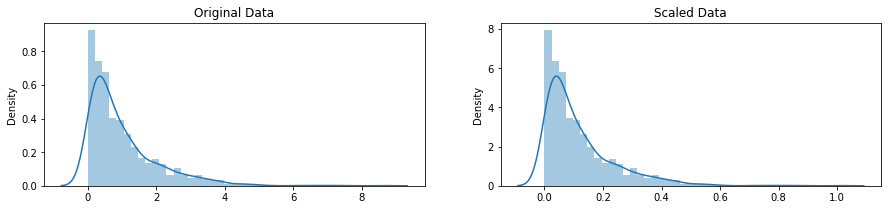

In [ ]:
# plotar os dois juntos para comparar
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

*Agora os dados vão variar de 0 a 1 no Scaled Data, e no Original Data varia de 0 a 8. Sem mudar a forma dos dados.*

### Normalização
*Na normalização, você está mudando a forma da distribuição de seus dados. O ponto de normalização é mudar suas observações para que possam ser descritas como uma distribuição normal.
A distribuição normal também é conhecida como distribuição gaussiana. O método que estamos usando para normalizar é chamado de transformação Box-Cox*
##### *Veja um exemplo:*

In [ ]:
# normalizando os dados exponenciais com boxcox
normalized_data = stats.boxcox(original_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

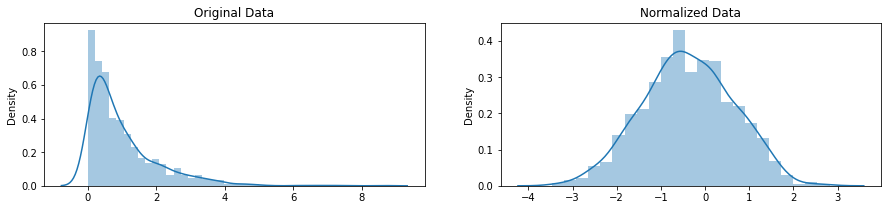

In [ ]:
# plotar os dois juntos para comparar
fig, ax=plt.subplots(1,2, figsize=(15,3))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Data")

*A forma dos dados mudou, para uma forma de 'sino', daí o nome 'curva em sino' como é conhecido a distribuição normal (distribuição gaussiana).*